<a href="https://colab.research.google.com/github/NoCodeProgram/deepLearning/blob/main/nn/adam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/NoCodeProgram/deepLearning.git

Cloning into 'deepLearning'...
remote: Enumerating objects: 100, done.
remote: Counting objects: 100% (100/100), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 100 (delta 25), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (100/100), 3.90 MiB | 6.66 MiB/s, done.
Resolving deltas: 100% (25/25), done.


In [2]:
import torch
import pandas as pd

# Load the DataFrame from a CSV file
df = pd.read_csv('./deepLearning/nn/swirl_10k.csv')
data = df[['x', 'y']].values
labels = df['label'].values.reshape(-1, 1)

# Print the shapes of the data and labels
print('Data shape:', data.shape)
print('Labels shape:', labels.shape)

Data shape: (20000, 2)
Labels shape: (20000, 1)


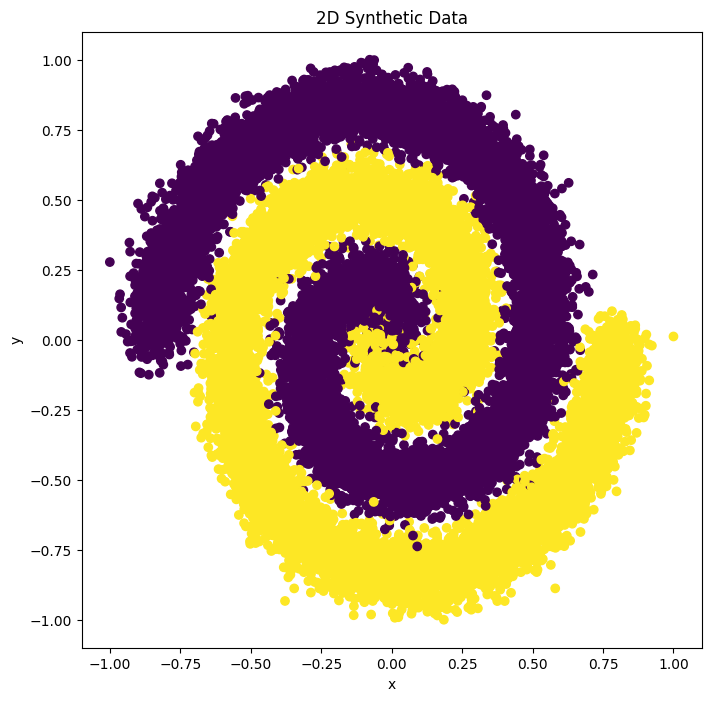

In [3]:

import matplotlib.pyplot as plt
# Create a scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(data[:,0], data[:,1], c=labels, cmap='viridis')
# plt.scatter(val_data[:,0], val_data[:,1], c=val_labels, cmap='viridis')

# Set the title and labels
plt.title('2D Synthetic Data')
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

In [4]:
import torch

# Convert the numpy arrays to PyTorch tensors
data_torch = torch.tensor(data, dtype=torch.float32)
labels_torch = torch.tensor(labels, dtype=torch.float32)
data_length = len(data_torch)
split_length = int(0.7*data_length)

train_data = data_torch[:split_length]
train_labels = labels_torch[:split_length]
val_data = data_torch[split_length:]
val_labels = labels_torch[split_length:]

print(train_data.shape, train_labels.shape)

torch.Size([14000, 2]) torch.Size([14000, 1])


In [5]:
g = torch.Generator().manual_seed(42)

def get_batch(data, labels, batch_size=256):
    # Generate random indices
    indices = torch.randint(0, len(data), size=(batch_size,), generator= g)

    # Select the data and labels at these indices
    data_batch = data[indices]
    labels_batch = labels[indices]

    return data_batch, labels_batch

data_batch, labels_batch = get_batch(train_data,train_labels)
print(data_batch.shape, labels_batch.shape)

torch.Size([256, 2]) torch.Size([256, 1])


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim



g.manual_seed(42)
torch.manual_seed(42)

class DNet(nn.Module):
    def __init__(self, input_size: int, hidden_size: int, output_size: int):
        super().__init__()
        self.seq_model = nn.Sequential(
            nn.Linear(input_size, hidden_size,bias=True),

            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size,bias=True),

            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size,bias=True),

            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(hidden_size, hidden_size,bias=True),

            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.seq_model(x)


dnet = DNet(input_size=2,hidden_size=16,output_size=1)
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(dnet.parameters(), lr=0.01)
sgd_val_losses = []

for steps in range(50000):
    dnet.train()
    train_batch, label_batch = get_batch(train_data, train_labels)
    output = dnet(train_batch)
    train_loss = loss_fn(output, label_batch)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if steps % 1000 == 0:
        dnet.eval()
        output = dnet(val_data)
        val_loss = loss_fn(output, val_labels)
        sgd_val_losses.append(val_loss.item())
        print(f"{steps} val_loss: {val_loss.item()}")

0 val_loss: 0.6951392292976379
1000 val_loss: 0.6916332244873047
2000 val_loss: 0.6890987157821655
3000 val_loss: 0.6826239824295044
4000 val_loss: 0.666638195514679
5000 val_loss: 0.6480310559272766
6000 val_loss: 0.6372805833816528
7000 val_loss: 0.6291173696517944
8000 val_loss: 0.6195746660232544
9000 val_loss: 0.6030640602111816
10000 val_loss: 0.5765455365180969
11000 val_loss: 0.5449846386909485
12000 val_loss: 0.5230845212936401
13000 val_loss: 0.5093602538108826
14000 val_loss: 0.4986817538738251
15000 val_loss: 0.4894869923591614
16000 val_loss: 0.4829953610897064
17000 val_loss: 0.47842076420783997
18000 val_loss: 0.47287777066230774
19000 val_loss: 0.4590873122215271
20000 val_loss: 0.4387447237968445
21000 val_loss: 0.38323861360549927
22000 val_loss: 0.36925870180130005
23000 val_loss: 0.3590351641178131
24000 val_loss: 0.34802091121673584
25000 val_loss: 0.33811154961586
26000 val_loss: 0.32537370920181274
27000 val_loss: 0.30577632784843445
28000 val_loss: 0.29262647032

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim



g.manual_seed(42)
torch.manual_seed(42)

class DNet(nn.Module):
    def __init__(self, input_size: int, hidden_size: int, output_size: int):
        super().__init__()
        self.seq_model = nn.Sequential(
            nn.Linear(input_size, hidden_size,bias=True),

            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size,bias=True),

            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size,bias=True),

            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(hidden_size, hidden_size,bias=True),

            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.seq_model(x)


dnet = DNet(input_size=2,hidden_size=16,output_size=1)
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(dnet.parameters(), lr=0.01)
adam_val_losses = []

for steps in range(50000):
    dnet.train()
    train_batch, label_batch = get_batch(train_data, train_labels)
    output = dnet(train_batch)
    train_loss = loss_fn(output, label_batch)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if steps % 1000 == 0:
        dnet.eval()
        output = dnet(val_data)
        val_loss = loss_fn(output, val_labels)
        adam_val_losses.append(val_loss.item())
        print(f"{steps} val_loss: {val_loss.item()}")

0 val_loss: 0.6927216053009033
1000 val_loss: 0.04752792418003082
2000 val_loss: 0.05152130126953125
3000 val_loss: 0.04450453817844391
4000 val_loss: 0.04223308712244034
5000 val_loss: 0.03998225927352905
6000 val_loss: 0.04017764702439308
7000 val_loss: 0.0401054322719574
8000 val_loss: 0.04065117612481117
9000 val_loss: 0.03252565488219261
10000 val_loss: 0.04043443128466606
11000 val_loss: 0.03516093268990517
12000 val_loss: 0.039901118725538254
13000 val_loss: 0.038663700222969055
14000 val_loss: 0.03978567570447922
15000 val_loss: 0.030656319111585617
16000 val_loss: 0.03585081920027733
17000 val_loss: 0.03255175054073334
18000 val_loss: 0.032260432839393616
19000 val_loss: 0.03414205461740494
20000 val_loss: 0.038707856088876724
21000 val_loss: 0.038598570972681046
22000 val_loss: 0.031762655824422836
23000 val_loss: 0.033775679767131805
24000 val_loss: 0.0361785888671875
25000 val_loss: 0.04343409091234207
26000 val_loss: 0.03602925315499306
27000 val_loss: 0.040678396821022034

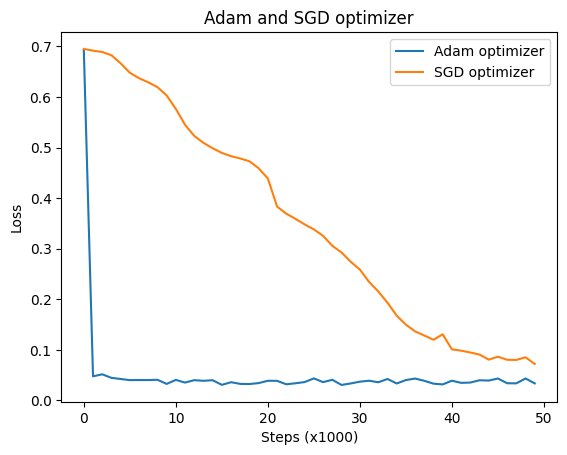

In [9]:
import matplotlib.pyplot as plt

plt.plot(adam_val_losses, label='Adam optimizer')
plt.plot(sgd_val_losses, label='SGD optimizer')
plt.title('Adam and SGD optimizer')
plt.xlabel('Steps (x1000)')
plt.ylabel('Loss')
plt.legend()
plt.show()